In [1]:
import pandas as pd
import seaborn as sb
import numpy as np

In [22]:
# select algorithm 
#path = "simulated_annealing"
path = "simulated_annealing_on_path"
#path = "randomized_best"
#path = "randomized_hillclimb"

In [23]:
df = pd.read_csv(path + "_groups.csv", sep="|")
df

,group_id,planned_time,real_time,travel_cost,delay,delay_in_%,waiting_time,in_trip_time,walks,path
0,1052,221,281,57,60,27,13,199,0,Davos Monstein$7843$Departure->40846$5$Trip->D...
1,1051,221,281,57,60,27,13,199,0,Davos Monstein$7843$Departure->40846$5$Trip->D...
2,1053,169,169,47,0,0,6,118,2,München ZOB (Hackerbrücke)$7861$Arrival->$12$W...
3,1054,169,169,47,0,0,6,118,2,München ZOB (Hackerbrücke)$7861$Arrival->$12$W...
4,1049,169,169,48,0,0,0,117,2,München ZOB (Hackerbrücke)$7861$Arrival->$12$W...
...,...,...,...,...,...,...,...,...,...,...
1047,2,86,146,38,60,69,12,94,0,Duisburg Hbf$7733$Arrival->137653$37$Trip->Dor...
1048,1,2,64,26,62,3100,12,33,1,München Hbf$7746$Arrival->$14$Walk->München Hb...
1049,12,239,360,53,121,50,4,272,1,München Leuchtenbergring$7920$Departure->10678...
1050,7,169,169,47,0,0,5,118,2,München ZOB (Hackerbrücke)$7861$Arrival->$12$W...


In [24]:
df[df["group_id"] == 1054]["path"].iloc[0]

'München ZOB (Hackerbrücke)$7861$Arrival->$12$Walk->München Hackerbrücke$7879$Departure->107348$8$Trip->München-Pasing$7887$Arrival->München-Pasing$7894$Departure->184$7$Trip->München Hbf Gl.27-36$7901$Arrival->$14$Walk->München Hbf$7915$Departure->138117$84$Trip->Erlangen$7999$Arrival->Erlangen$8007$Departure->108419$8$Trip->Forchheim(Oberfr)$8015$Arrival->Forchheim(Oberfr)$8019$Departure->140333$11$Trip->Kirchehrenbach$8030$Arrival'

# Calculate different delay cost metrics

In [4]:
print("Total delay:", df["delay"].sum(), "min", "=", df["delay"].sum()/60, "h")
print("Average delay:", np.mean(df["delay"]), "min", "=", np.mean(df["delay"])/60, "h")
print("Median delay:", np.median(df["delay"]), "min", "=", np.median(df["delay"])/60, "h")
print("\n###########################\n")
print("Min delay:", df["delay"].min(), "min", "=", df["delay"].min()/60, "h:")
display(df[df["delay"] == df["delay"].min()])
path_ = df[df["delay"] == df["delay"].min()]["path"].iloc[0]
print(path_)
print("\n###########################\n")
print("Max delay:", df["delay"].max(), "min", "=", df["delay"].max()/60, "h:")
display(df[df["delay"] == df["delay"].max()])
path_ = df[df["delay"] == df["delay"].max()]["path"].iloc[0]
print(path_)
print("\n###########################\n")
print("Average % delay:", np.mean(df["delay_in_%"]), "%")
print("Median % delay:", np.median(df["delay_in_%"]), "%")
print("Min % delay:", df["delay_in_%"].min(), "%")
print("Max % delay:", df["delay_in_%"].max(), "%")

Total delay: 59315 min = 988.5833333333334 h
Average delay: 56.383079847908746 min = 0.9397179974651457 h
Median delay: 20.0 min = 0.3333333333333333 h

###########################

Min delay: -239 min = -3.9833333333333334 h:


,group_id,planned_time,real_time,travel_cost,delay,delay_in_%,waiting_time,in_trip_time,walks,path
640,412,320,81,34,-239,-74,22,35,0,München Hbf.7714.Departure->75222.8.Trip->Münc...


München Hbf.7714.Departure->75222.8.Trip->München Ost.7722.Arrival->München Ost.7742.Departure->107586.27.Trip->Ottenhofen(Oberbay).7769.Arrival

###########################

Max delay: 1388 min = 23.133333333333333 h:


,group_id,planned_time,real_time,travel_cost,delay,delay_in_%,waiting_time,in_trip_time,walks,path
748,302,620,2008,60,1388,223,11,896,2,Ceska Lipa - Holy vrch.7772.Departure->139864....


Ceska Lipa - Holy vrch.7772.Departure->139864.38.Trip->Decin hl.n..7810.Arrival->Decin hl.n..7826.Departure->139751.102.Trip->Praha hl.n..7928.Arrival->Praha hl.n..7953.Departure->2098.252.Trip->Regensburg Hbf.8205.Arrival->.935.Walk->Regensburg Bahnhofstraße (Fernbushalt).9140.Departure->137154.69.Trip->Waidhaus(Gr).9209.Arrival->Waidhaus(Gr).9310.Departure->137174.310.Trip->Mannheim Hbf (Busbahnhof).9620.Arrival->.10.Walk->Mannheim Hbf.9632.Departure->137436.36.Trip->Frankfurt(Main)Hbf.9668.Arrival->Frankfurt(Main)Hbf.9681.Departure->99880.58.Trip->Marburg(Lahn).9739.Arrival->Marburg(Lahn).9749.Departure->104867.31.Trip->Ernsthausen.9780.Arrival

###########################

Average % delay: 48.89543726235741 %
Median % delay: 10.0 %
Min % delay: -74 %
Max % delay: 3100 %


<AxesSubplot:xlabel='delay_in_%', ylabel='Count'>

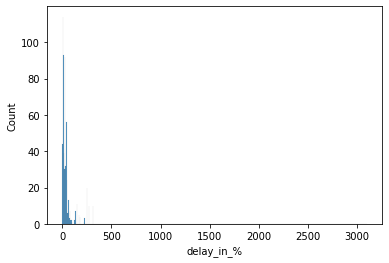

In [5]:
sb.histplot(df, x="delay_in_%", bins=range(1, df["delay_in_%"].max()+1, 5))

<AxesSubplot:xlabel='delay_in_%', ylabel='Count'>

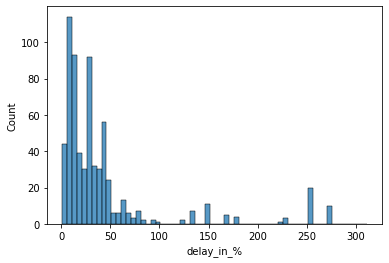

In [6]:
sb.histplot(df, x="delay_in_%", bins=range(1, sorted(df["delay_in_%"])[-10]+1, 5))

# Calculate different travel cost metrics

In [7]:
print("Total travel cost:", df["travel_cost"].sum())
print("Average travel cost:", np.mean(df["travel_cost"]))
print("Median travel cost:", np.median(df["travel_cost"]))
print("Min travel cost:", df["travel_cost"].min())
print("Max travel cost:", df["travel_cost"].max())

Total travel cost: 46593
Average travel cost: 44.289923954372625
Median travel cost: 40.0
Min travel cost: 1
Max travel cost: 178


In [8]:
print("Total number of walks:", df["walks"].sum())
print("Average number of walks:", np.mean(df["walks"]))
print("Median number of walks:", np.median(df["walks"]))
print("Min number of walks:", df["walks"].min())
print("Max number of walks:", df["walks"].max())

Total number of walks: 880
Average number of walks: 0.8365019011406845
Median number of walks: 1.0
Min number of walks: 0
Max number of walks: 4


In [9]:
print("Total waiting time:", df["waiting_time"].sum())
print("Average waiting time:", np.mean(df["waiting_time"]))
print("Median waiting time:", np.median(df["waiting_time"]))
print("Min waiting time:", df["waiting_time"].min())
print("Max waiting time:", df["waiting_time"].max())

Total waiting time: 13424
Average waiting time: 12.760456273764259
Median waiting time: 8.0
Min waiting time: 0
Max waiting time: 144


In [10]:
print("Total time in train:", df["in_trip_time"].sum())
print("Average time in train:", np.mean(df["in_trip_time"]))
print("Median time in train:", np.median(df["in_trip_time"]))
print("Min time in train:", df["in_trip_time"].min())
print("Max time in train:", df["in_trip_time"].max())

Total time in train: 227781
Average time in train: 216.5218631178707
Median time in train: 179.0
Min time in train: 2
Max time in train: 896


# Calculate different edge cost metrics

In [11]:
df = pd.read_csv(path + "_edges.csv", sep="|")
df

,edge_index,duration,capacity,utilization
0,EdgeIndex(3391671),39,113,2
1,EdgeIndex(2219371),6,131,27
2,EdgeIndex(2575873),1,263,1
3,EdgeIndex(3395635),44,591,9
4,EdgeIndex(2864073),5,147,1
...,...,...,...,...
2796,EdgeIndex(2446611),3,273,44
2797,EdgeIndex(3411943),20,0,5
2798,EdgeIndex(3400783),7,344,6
2799,EdgeIndex(2586921),1,238,14


In [12]:
print("Number of strained trip edges:", len(df))
df_filtered = df[df['capacity'] < df['utilization']].loc[:]
print("Number of strained trip edges with utilization > capacity:", len(df_filtered))
df_filtered["overload"] = df_filtered["utilization"]-df_filtered["capacity"]
print("Total overload (only edges with utilization > capacity):", df_filtered["overload"].sum())
print("Average overload (only edges with utilization > capacity):", np.mean(df_filtered["overload"]))
print("Median overload (only edges with utilization > capacity):", np.median(df_filtered["overload"]))
print("Max overload of one edge:", df_filtered["overload"].max())
df_filtered

Number of strained trip edges: 2801
Number of strained trip edges with utilization > capacity: 155
Total overload (only edges with utilization > capacity): 2701
Average overload (only edges with utilization > capacity): 17.425806451612903
Median overload (only edges with utilization > capacity): 6.0
Max overload of one edge: 102


,edge_index,duration,capacity,utilization,overload
83,EdgeIndex(3412187),33,1,17,16
98,EdgeIndex(1749539),8,27,33,6
123,EdgeIndex(3411421),13,0,1,1
127,EdgeIndex(1734191),22,0,6,6
180,EdgeIndex(3411939),33,0,5,5
...,...,...,...,...,...
2745,EdgeIndex(3322493),6,2,4,2
2754,EdgeIndex(1262603),12,0,10,10
2759,EdgeIndex(3390069),4,0,33,33
2768,EdgeIndex(3390669),3,0,23,23


<AxesSubplot:xlabel='overload', ylabel='Count'>

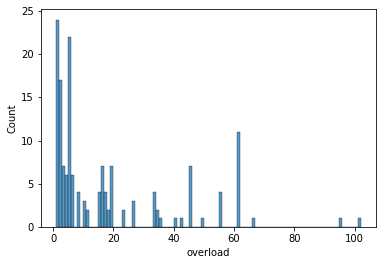

In [13]:
sb.histplot(df_filtered, x="overload", bins=range(1, df_filtered["overload"].max()+1))

# Cost Quantile

In [14]:
df = pd.read_csv(path + "_100_runs.csv")
df

FileNotFoundError: [Errno 2] No such file or directory: 'randomized_hillclimb_100_runs.csv'

In [ ]:
df.quantile([0.25, 0.5, 0.75])

In [ ]:
sb.histplot(df, x="cost", bins=range(df['cost'].min(), df['cost'].max() + 1000, 1000))

In [ ]:
# Anmerkung
# Anfang Box: unteres quartil (0.25 Quantil)
# Ende Box: oberes quartil (0.75 Quantil)
# Strich in Box: Median
sb.boxplot(x=df["cost"])

In [ ]:
sb.histplot(df, x="edge_cost", bins=range(df['edge_cost'].min(), df['edge_cost'].max() + 1000, 1000))

In [ ]:
sb.boxplot(x=df["edge_cost"])

In [ ]:
sb.histplot(df, x="travel_cost", bins=range(df['travel_cost'].min(), df['travel_cost'].max() + 100, 100))

In [ ]:
sb.boxplot(x=df["travel_cost"])

In [ ]:
sb.histplot(df, x="delay_cost", bins=range(df['delay_cost'].min(), df['delay_cost'].max() + 1000, 1000))

In [ ]:
sb.boxplot(x=df["delay_cost"])